In [1]:
import os
import glob
import time
import json

import networkx as nx
import math

# Data Paths

In [2]:
data_path = "/DATA/7A/assets/erc721tokens/CryptoKitties/"

graph_name = "CryptoKitties"

In [3]:
with open(data_path + graph_name + '.json') as f:
    graph_info = json.load(f)
graph_info['name'], graph_info['#nodes'], graph_info['#edges']

('CryptoKitties', 114527, 5434740)

# Create NetworkX Graph

In [5]:
#create multidigraph
edges = graph_info["edges"]

graph = nx.MultiDiGraph()
for e in edges:
    u = e[0]
    v = e[1]
    t = e[2]
    graph.add_edge(u, v, timestamp=t)

nx.info(graph)

'Name: \nType: MultiDiGraph\nNumber of nodes: 114527\nNumber of edges: 5434740\nAverage in degree:  47.4538\nAverage out degree:  47.4538'

## create network snapshots

In [6]:
time_period = 60*60*24*90 # 90 day periods

mindelta = edges[0][2]
maxdelta = edges[0][2]
for e in edges:
    if e[2] > maxdelta:
        maxdelta = e[2]
    if e[2] < mindelta:
        mindelta = e[2]
print(mindelta, maxdelta)
duration = maxdelta - mindelta
num_snapshots = math.ceil(duration / time_period)
print("Number of snapshots", num_snapshots)

graphs = []
for x in range(0,num_snapshots):
    tg = nx.DiGraph()
    #tg["name"] = str(x)
    graphs.append(nx.DiGraph())
    

for u,v,t in graph.edges(data=True):
    idx = math.floor((t["timestamp"] - mindelta) / time_period)
    graphs[idx].add_edge(u, v)
    
for g in graphs:
    print(nx.info(g))

1511415679 1615234784
Number of snapshots 14
Name: 
Type: DiGraph
Number of nodes: 65965
Number of edges: 211848
Average in degree:   3.2115
Average out degree:   3.2115
Name: 
Type: DiGraph
Number of nodes: 15071
Number of edges: 35186
Average in degree:   2.3347
Average out degree:   2.3347
Name: 
Type: DiGraph
Number of nodes: 10200
Number of edges: 22383
Average in degree:   2.1944
Average out degree:   2.1944
Name: 
Type: DiGraph
Number of nodes: 8831
Number of edges: 20554
Average in degree:   2.3275
Average out degree:   2.3275
Name: 
Type: DiGraph
Number of nodes: 7287
Number of edges: 16338
Average in degree:   2.2421
Average out degree:   2.2421
Name: 
Type: DiGraph
Number of nodes: 7875
Number of edges: 17411
Average in degree:   2.2109
Average out degree:   2.2109
Name: 
Type: DiGraph
Number of nodes: 7115
Number of edges: 14812
Average in degree:   2.0818
Average out degree:   2.0818
Name: 
Type: DiGraph
Number of nodes: 5418
Number of edges: 11887
Average in degree:   2.1

# Analysis

In [16]:
import collections
import matplotlib.pyplot as plt
import numpy as np

## hub vertices

- which tokens share hubs? (if they share any)

- can we find liquidity providers by checking neighbors of hub vertices?


In [17]:
degrees = graph.degree
print("All time:")
print(sorted(degrees, key=lambda t: t[1], reverse=True)[:5])
c = 0
for g in graphs:
    print("T =", c)
    c += 1
    print(sorted(g.degree, key=lambda t: t[1], reverse=True)[:5])

All time:
[('0xb1690c08e213a35ed9bab7b318de14420fb57d8c', 2131591), ('0x0000000000000000000000000000000000000000', 1996428), ('0xc7af99fe5513eb6710e6d5f44f9989da40f27f26', 597023), ('0x68b42e44079d1d0a4a037e8c6ecd62c48967e69f', 292725), ('0x09fe5f0236f0ea5d930197dce254d77b04128075', 170161)]
T = 0
[('0xb1690c08e213a35ed9bab7b318de14420fb57d8c', 101924), ('0xc7af99fe5513eb6710e6d5f44f9989da40f27f26', 51412), ('0x0000000000000000000000000000000000000000', 48487), ('0xbd77aee5f4d066257803099c266421eaa472fb5e', 788), ('0xba52c75764d6f594735dc735be7f1830cdf58ddf', 187)]
T = 1
[('0xb1690c08e213a35ed9bab7b318de14420fb57d8c', 16042), ('0xc7af99fe5513eb6710e6d5f44f9989da40f27f26', 7769), ('0x0000000000000000000000000000000000000000', 6002), ('0xc273487f0e8b0e55f612f69f5e29074e986180dd', 421), ('0xb2c3531f77ee0a7ec7094a0bc87ef4a269e0bcfc', 159)]
T = 2
[('0xb1690c08e213a35ed9bab7b318de14420fb57d8c', 10046), ('0xc7af99fe5513eb6710e6d5f44f9989da40f27f26', 4435), ('0x00000000000000000000000000000000

## degree distribution

- is there a difference between erc20 and erc721 degree distributions?
- user profiling => degree distribution of users across graphs 
- user activity profiling => temporal degree distribution 
    - for diffent time granularities

Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...


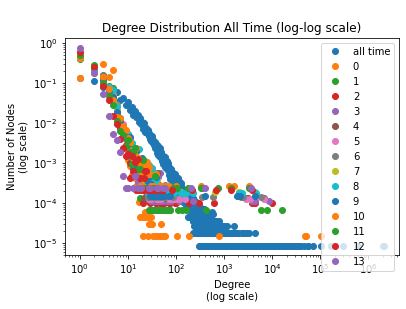

In [18]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

x, y = plot_degree_histogram(graph)
plt.title('\nDegree Distribution All Time (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(x, y, 'o', label = "all time")

c = 0
for g in graphs:
    x, y = plot_degree_histogram(g)
    plt.plot(x, y, 'o', label=c)
    c += 1
plt.legend()

- degree distribution could show us whales in marketplaces?
- nft galleries? :)
    
**Degree distribution at a **

- degree distribution change 